In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('spam.csv')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df['v2'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [193]:
df.shape

(5572, 5)

In [194]:
# 1.Data Cleaning
# 2.EDA 
# 3.Test Preprocessing 
# 4.Model building 
# 5.Evaluation 
# 6.Improvement 
# 7.Website
# 8.Deploy

## 1.Data Cleaning

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [196]:
#drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [197]:
df.sample(5)

,v1,v2
2585,ham,I will be outside office take all from there
4100,spam,GSOH? Good with SPAM the ladies?U could b a ma...
5004,ham,Guess which pub im in? Im as happy as a pig in...
4284,ham,I pocked you up there before
3166,ham,"When people see my msgs, They think Iam addict..."


In [198]:
#renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [199]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [200]:
df['target']=encoder.fit_transform(df['target'])

In [201]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [202]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [203]:
#check for duplicate values
df.duplicated().sum()

403

In [204]:
df=df.drop_duplicates(keep='first')

In [205]:
df.duplicated().sum()

0

In [206]:
df.shape

(5169, 2)

## 2.EDA

In [207]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

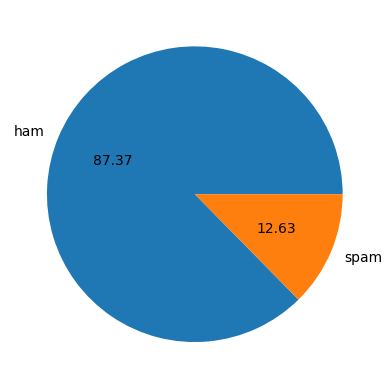

In [208]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

### Data is imbalanced

In [209]:
import nltk

In [210]:
# nltk.download('punkt')

In [211]:
#dviding each characters from sms by len 
df['num_characters']=df['text'].apply(len)

In [212]:
#num of words by word_tokenize
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [213]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [214]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [215]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [216]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [217]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [218]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

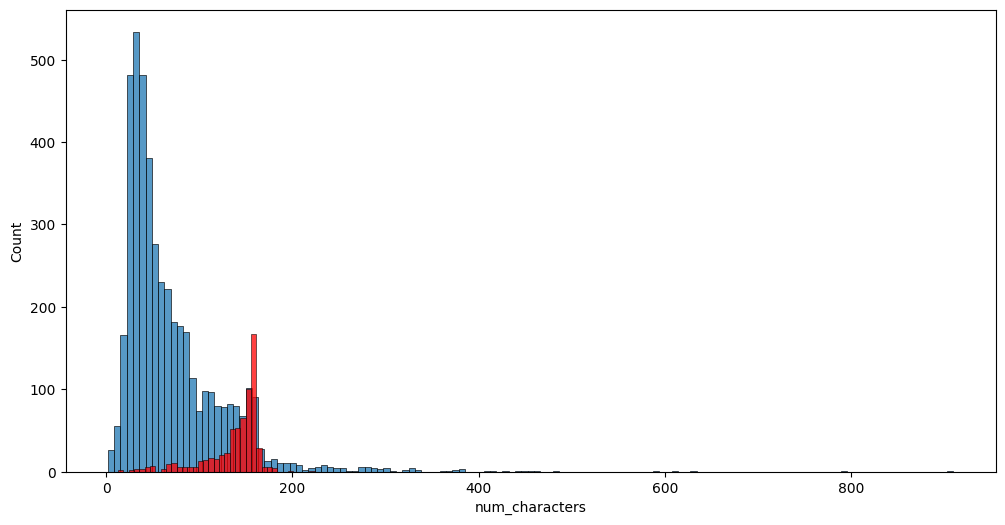

In [219]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

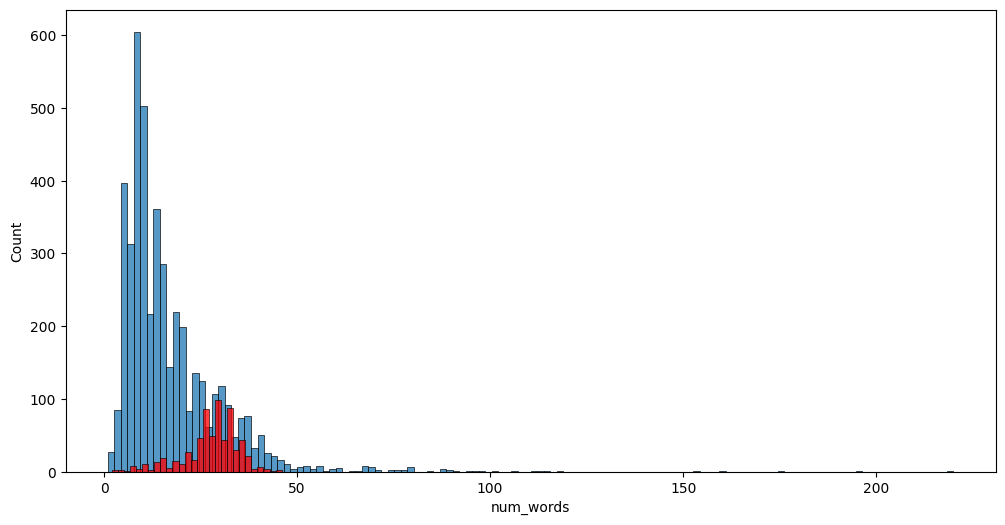

In [220]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

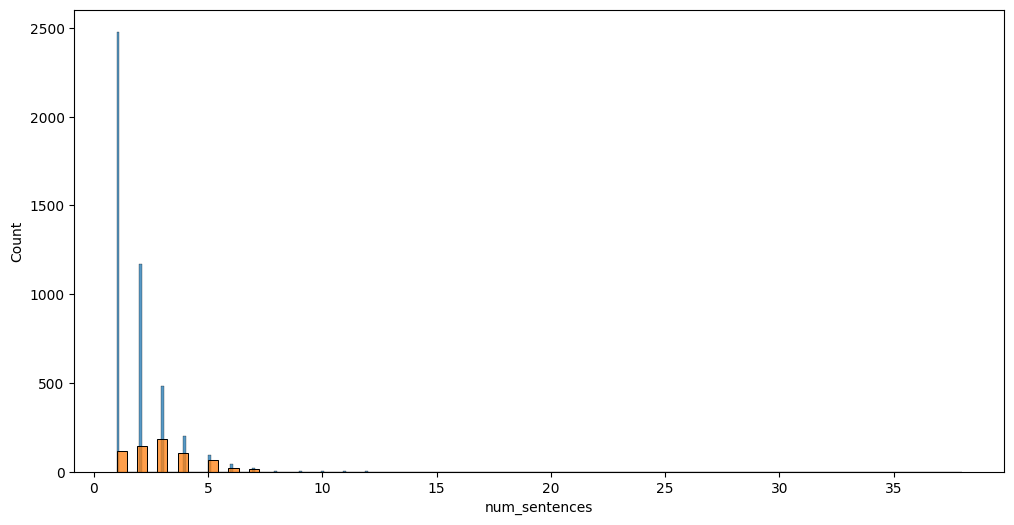

In [221]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'])

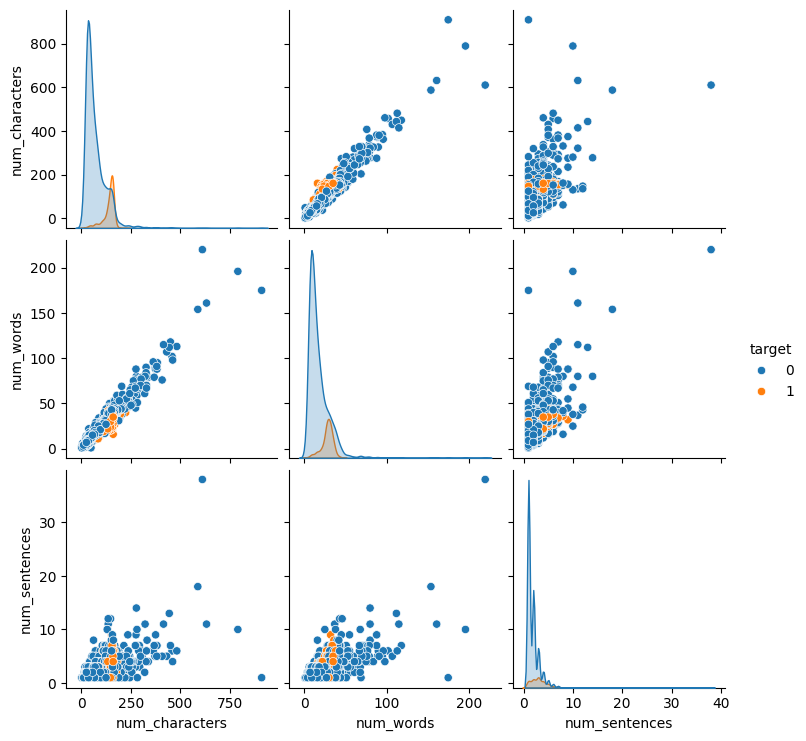

In [222]:
sns.pairplot(df,hue='target')

### Ouliers in the data

In [223]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [224]:
df1=df[['target','num_characters','num_words','num_sentences']]

In [225]:
df1.head()

,target,num_characters,num_words,num_sentences
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1


<Axes: >

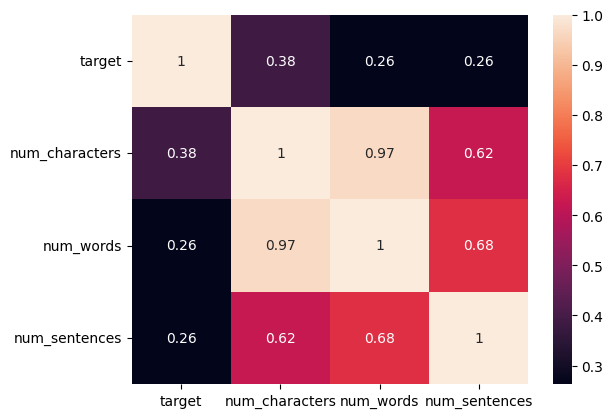

In [226]:
sns.heatmap(df1.corr(),annot=True)

### 3.Data Preprocessing<br>
* Lower case
* Tokenization
* Removing special characters
* Stemming

In [227]:
import string
#nltk.download('stopwords')

In [228]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


In [229]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [230]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [231]:
text="i love mango"
nltk.word_tokenize(text)

['i', 'love', 'mango']

In [232]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]#cloning
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)#return in string

Here we followed all steps to preprocess the data.very first whole text converted to lowercase and the words tokens are made using word_tokenize.created empty list and appended only alphanumeric characters in it and cloned with <code>text</code> and empty the list and in it appended words ignoring stopwords and punctuation using <code>stopwords.words</code> and <code>string.punctuation</code> using for loop and at final applied stemming which brings any word to its root word for e.g dancing to danc<br> <h5>This how we transformed whole text </h5>

In [233]:
df['transformed_text']=df['text'].apply(transform_text)

In [234]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### To see most frequent important words in spam we use <code>wordcloud</code>

In [235]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [236]:
#filtering spam sms from transformed_text on basis of string and concating based on spaces
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

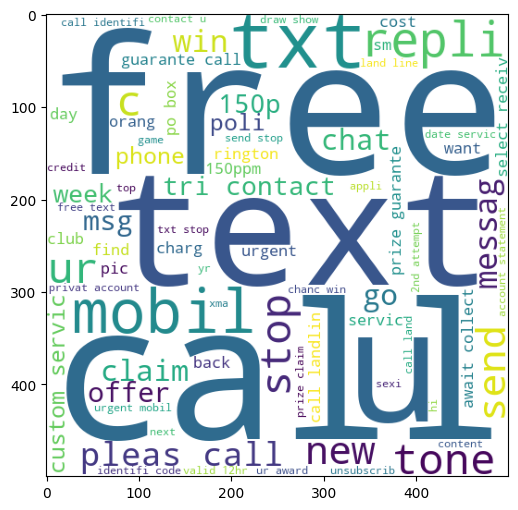

In [237]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [238]:
#filtering ham sms from transformed_text on basis of string and concating spaces
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

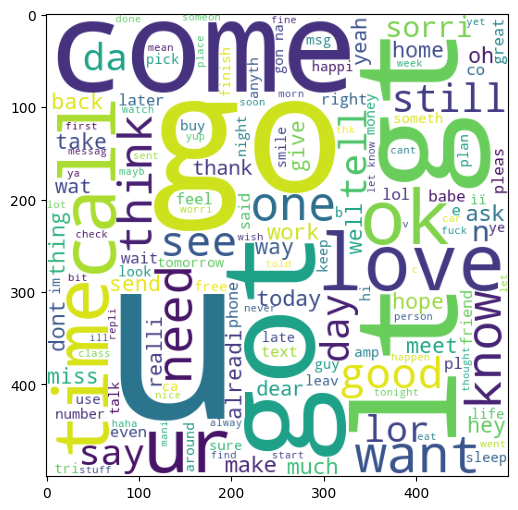

In [239]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

Will see top 30 words in ham and in spam

In [240]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [241]:
len(spam_corpus)

9939

Here extracted <code>spam</code> data from target column and <code>transformed_text</code> column converted series to list started loop and appended all words in list here we have approximately 10000 

In [242]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

C:\Users\Dhanashree Chaudhari\AppData\Local\Temp\ipykernel_25104\1922169730.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='spam', y='count', data=df_most_common_30,palette=custom_palette)


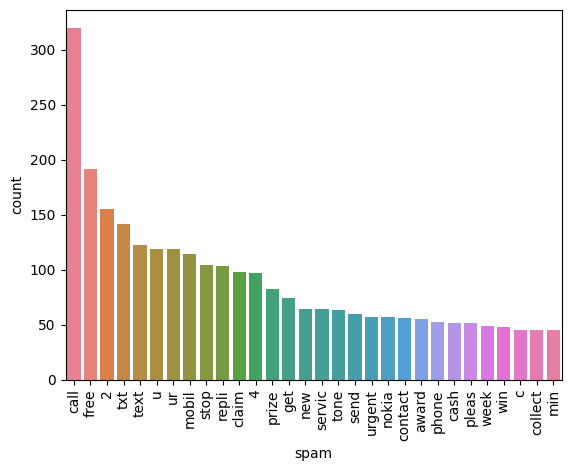

In [243]:
# Import required libraries
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Assume spam_corpus is defined and contains the data
# For example: spam_corpus = ["word1", "word2", "word1", ...]

# Count the occurrences of each item in the spam_corpus
counter = Counter(spam_corpus)

# Get the 30 most common items
most_common_30 = counter.most_common(30)

# Convert the most common items into a DataFrame
df_most_common_30 = pd.DataFrame(most_common_30, columns=['spam', 'count'])

# Create the bar plot
custom_palette = sns.color_palette("husl", 30)
sns.barplot(x='spam', y='count', data=df_most_common_30,palette=custom_palette)

# Rotate the x-axis labels for better readability
plt.xticks(rotation='vertical')

# Display the plot
plt.show()


Here we used <code>counter</code> library from collections which returns dictionary of words and number of their occurence.we 

In [244]:
spam_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

C:\Users\Dhanashree Chaudhari\AppData\Local\Temp\ipykernel_25104\2614857832.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ham', y='count', data=df_most_common_30,palette='bright')


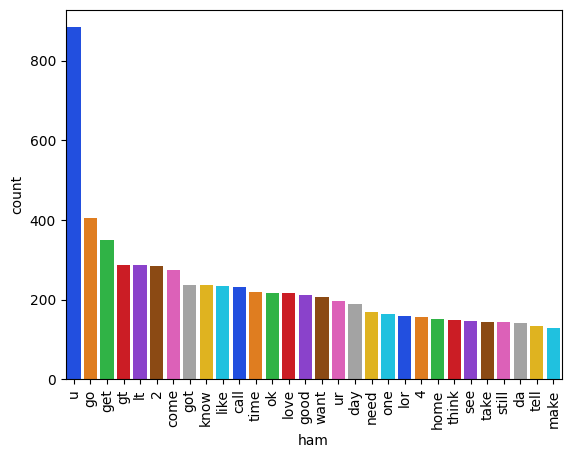

In [245]:
# Import required libraries
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume spam_corpus is defined and contains the data
# For example: spam_corpus = ["word1", "word2", "word1", ...]

# Count the occurrences of each item in the spam_corpus
counter = Counter(spam_corpus)

# Get the 30 most common items
most_common_30 = counter.most_common(30)

# Convert the most common items into a DataFrame
df_most_common_30 = pd.DataFrame(most_common_30, columns=['ham', 'count'])

# Create the bar plot
sns.barplot(x='ham', y='count', data=df_most_common_30,palette='bright')

# Rotate the x-axis labels for better readability
plt.xticks(rotation='vertical')

# Display the plot
plt.show()


### 4.Model Building

For model building we will use naive bayes but for we need numerical data so using <code>CountVectorizer</code> will create vectors of words

In [301]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [302]:
#X=cv.fit_transform(df['transformed_text']).toarray()
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [290]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# # X=scaler.fit_transform(X)

MinMaxScaler does not have much effect on results

In [291]:
X.shape
#5169 sms and 6708 words

(5169, 3000)

In [292]:
y=df['target'].values

In [293]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [294]:
from sklearn.model_selection import train_test_split

In [295]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [296]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [297]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [298]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [299]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [300]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


Our data is very imbalanced so more than accuracy more precision is required we got more precision using <code>TfidfVectorizer</code> and distribution used is <code>MultinomialNB</code>

In [259]:
#ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [260]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [261]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'Adaboost':abc,
    'Bgc':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [262]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return accuracy,precision

In [263]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [264]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precion - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precion -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precion -  1.0
For  NB
Accuracy -  0.9709864603481625
Precion -  1.0
For  DT
Accuracy -  0.9303675048355899
Precion -  0.8367346938775511
For  LR
Accuracy -  0.9584139264990329
Precion -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precion -  0.9829059829059829


c:\Users\Dhanashree Chaudhari\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  Adaboost
Accuracy -  0.960348162475822
Precion -  0.9292035398230089
For  Bgc
Accuracy -  0.9584139264990329
Precion -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precion -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precion -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precion -  0.9262295081967213


In [265]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [266]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,Adaboost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,Bgc,0.958414,0.868217


In [267]:
performance_df1=pd.melt(performance_df,id_vars="Algorithm")

In [268]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,Adaboost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,Bgc,Accuracy,0.958414


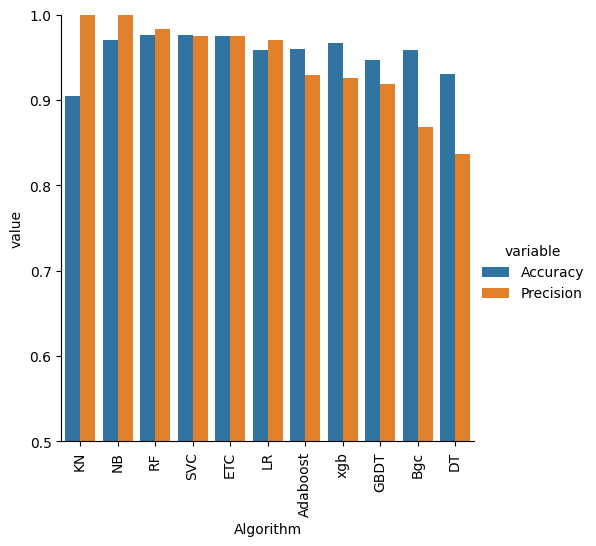

In [269]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

Model Improve<br>
1.Change the max_features parameter of TfIdf

In [270]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [271]:
new_df=performance_df.merge(temp_df,on='Algorithm')

In [272]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [273]:
new_df=performance_df.merge(temp_df,on='Algorithm')

In [274]:
new_df_scaled=new_df.merge(temp_df,on='Algorithm')

In [275]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [276]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,Adaboost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,Bgc,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


VotingClassifier is combination of multiple algorithms.Here all algorithms are treated as equal<br>Here we used it our best performing algorithms

In [277]:
#voting Classifier
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
from sklearn.ensemble import VotingClassifier

In [278]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [279]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [280]:
y_pred=voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


stacking is applied which is same as votingclassifier but algorithms are used based on weightages using final_estimator

In [281]:
#Applying stacking
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimators=RandomForestClassifier()

In [282]:
from sklearn.ensemble import StackingClassifier

In [283]:
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimators)

In [284]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9393939393939394


We tried different methods to improve model we got precision as 1 in multinomialNB model but we were trying to increase our accuracy but we did not got so will use multinomialNB

In [303]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))